In [ ]:
import random
for i in range(5) :
    lotto_set = set()
    while True : 
        lotto_num = int(random.random() * 45) + 1
        lotto_set.add(lotto_num)
        len_set = len(lotto_set)
        if len_set >= 6 :
            break
    print(lotto_set)

In [ ]:
import random
for i in range(5) :
    lotto_set = set()
    while len(lotto_set) <= 7 :
        lotto_set.add( random.randint(1, 45) ) # 1에서 45 이하
    bonus_num = lotto_set.pop()
    print(lotto_set, '+', bonus_num)

In [ ]:
import random
for i in range(5) :
    lotto_set = random.sample(range(1, 46), 7)
    bonus_num = lotto_set.pop()
    print(sorted(lotto_set), '+', bonus_num)

In [2]:
def lotto_get(count = 1) :
    import random
    for i in range(5) :
        lotto_set = random.sample(range(1, 46), 7)
        bonus_num = lotto_set.pop()
        print(sorted(lotto_set), '+', bonus_num)
    print()
    count -= 1
    if count > 0 :
        lotto_get(count) # 재귀 
    else :
        return 


how = input('몇 장 드릴까용? : ')
try : 
    assert int(how) > 1, f'양수만 입력 가능합니다.!! {how}을 입력하셨습니다.' # 참이면 ok 거짓이면 에러
    lotto_get(int(how))
except ValueError as e :
    print(type(e).__name__, ' 숫자만 입력하세요 :', e)
except Exception as e :
    print(type(e).__name__, ':', e)

[15, 19, 22, 26, 37, 39] + 32
[3, 10, 21, 25, 31, 41] + 1
[6, 9, 15, 30, 40, 43] + 23
[7, 12, 17, 18, 24, 39] + 15
[3, 9, 11, 20, 28, 32] + 25

[1, 8, 21, 32, 33, 40] + 11
[2, 3, 11, 15, 18, 45] + 5
[12, 18, 27, 38, 40, 41] + 34
[3, 7, 10, 27, 39, 45] + 9
[12, 16, 26, 30, 40, 42] + 44

[7, 22, 23, 30, 35, 40] + 1
[6, 23, 27, 30, 35, 36] + 29
[2, 10, 19, 20, 37, 42] + 11
[11, 30, 33, 35, 38, 39] + 34
[6, 10, 14, 16, 22, 29] + 17



In [ ]:
# 몇장 드릴까용? 이후에
# 얼마입니다~ (장당 5천원)
# 모자랍니다~, 거스름돈 얼마입니다~


        id  win1  win2  win3  win4  win5  win6  bonus
0        1    10    23    29    33    37    40     16
1        2     9    13    21    25    32    42      2
2        3    11    16    19    21    27    31     30
3        4    14    27    30    31    40    42      2
4        5    16    24    29    40    41    42      3
...    ...   ...   ...   ...   ...   ...   ...    ...
1123  1124     3     8    17    30    33    34     28
1124  1125     6    14    25    33    40    44     30
1125  1126     4     5     9    11    37    40      7
1126  1127    10    15    24    30    31    37     32
1127  1128     1     5     8    16    28    33     45

[1128 rows x 8 columns]


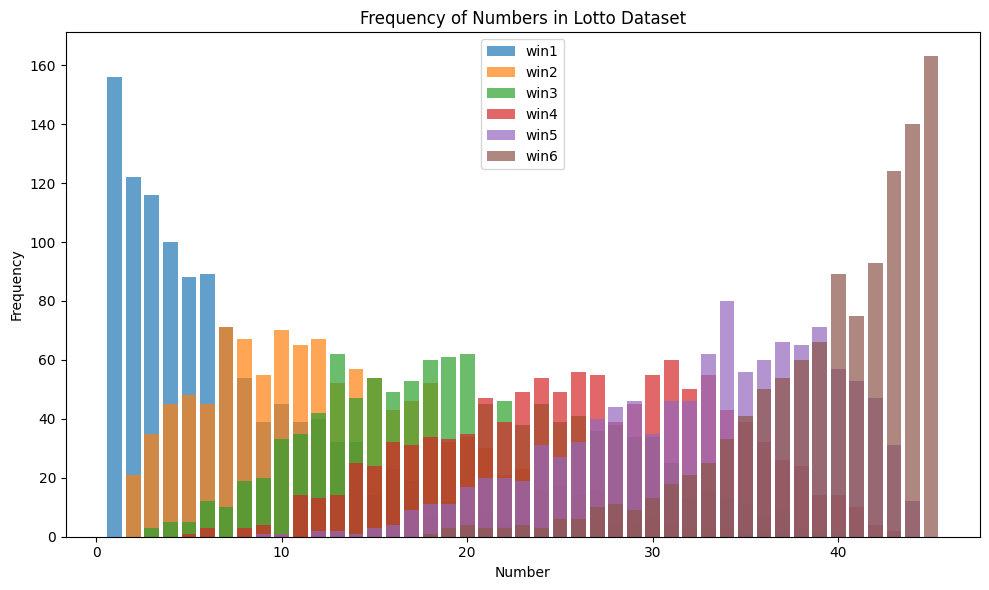

In [10]:
import sqlite3
import pandas as pd
conn =  sqlite3.connect('../data/lotto.db')
cursor = conn.cursor()
rows = cursor.execute('select * from win').fetchall()

pass # TODO

conn.close()


# 컬럼 명 리스트
columns = ['id', 'win1', 'win2', 'win3', 'win4', 'win5', 'win6', 'bonus']

# DataFrame 생성
df = pd.DataFrame(rows, columns=columns)

# DataFrame 출력
print(df)

# 중복된 숫자의 개수 카운트
counts = {}
for col in df.columns[1:7]:  # win1부터 win6까지만 확인
    counts[col] = df[col].value_counts()

# 그래프 생성
plt.figure(figsize=(10, 6))
for col, count in counts.items():
    plt.bar(count.index, count.values, alpha=0.7, label=col)

plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Frequency of Numbers in Lotto Dataset')
plt.legend()
plt.tight_layout()
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt



In [24]:
# 기 당첨 누적치. 각번호당 뽑힌 누적치. 
import sqlite3
import pandas as pd
conn =  sqlite3.connect('../data/lotto.db')
cursor = conn.cursor()
rows = cursor.execute('select * from win').fetchall()

pass # TODO

# 가중치 : 연속으로 당첨될 경우 가중치가 늘어난다 
def weighting(val : float, up_down : bool = True) -> float :   # 웨이팅 : 가중치, 지역수당
    """가중치를 적용해서 리턴한다

    Args: 
        val (int) : 가중치를 넣는다.
        up_down (bool) : True: 올림, False:내림\n\t 가중치를 올린 건지 내릴 건지 결정 한다
    Returns:
        (float) : 가중치를 계산해서 리턴한다
    """
    up = 0.05
    down = 0.01
    if up_down == True :
        val += (val * up)
    elif up_down == False : 
        val -= (val * down)    
    
    return val

# accumulate = {} #어큐멀레이트 : 모으다 축적하다
# 가중치 적용 딕셔너리 : 번호 : [카운트, 가중치]
accumulate = { key : [0, 100.0] for key in range(1, 46) } # 초기 가중치를 넣어서 테이블을 초기화 한다.
print(accumulate)
for row in rows : # 당첨된 테이블을 순회 한다.
    # print(row)
    # 전체 레인지 1~45 를 돌면서 당첨은 가중치 업 낙첨은 가중치 다운
    for item in accumulate.items() :
        # print(item)
        index = item[0]
        count = item[1][0]
        weight = item[1][1]
        if index in row : 
            # print(index)
            accumulate.update({index : [count + 1, weighting(weight)]})
        else : # 카운트 누적하지 않고 가중치 내림
            accumulate.update({index : [count, weighting(weight, up_down=False)]})

    '''
    for i in row[1:-1] : # 당첨된 번호 6개를 확인한다.
        # print(i)
        # if not accumulate.get(i) : # 키가 없으면
        #     accumulate[i] = [0, weighting()] # 초기화
        accumulate.update({i : [accumulate.get(i)[0] + 1, weighting(accumulate.get(i)[1])]})
        '''

print(len(accumulate), accumulate)
keys =  sorted(accumulate.keys())
for i in keys :
    print(f'{i:02}', accumulate.get(i), end='\t')
    if i % 5 == 0 and i != 0 :
        print()

conn.close()

# 가중치 
# 루프를 돌때 가중치를 전체적으로 줄이고 당첨되면 가중치를 증가시킨다. 또는 가중치를 반으로 나누고 당첨되면 더블링

{1: [0, 100.0], 2: [0, 100.0], 3: [0, 100.0], 4: [0, 100.0], 5: [0, 100.0], 6: [0, 100.0], 7: [0, 100.0], 8: [0, 100.0], 9: [0, 100.0], 10: [0, 100.0], 11: [0, 100.0], 12: [0, 100.0], 13: [0, 100.0], 14: [0, 100.0], 15: [0, 100.0], 16: [0, 100.0], 17: [0, 100.0], 18: [0, 100.0], 19: [0, 100.0], 20: [0, 100.0], 21: [0, 100.0], 22: [0, 100.0], 23: [0, 100.0], 24: [0, 100.0], 25: [0, 100.0], 26: [0, 100.0], 27: [0, 100.0], 28: [0, 100.0], 29: [0, 100.0], 30: [0, 100.0], 31: [0, 100.0], 32: [0, 100.0], 33: [0, 100.0], 34: [0, 100.0], 35: [0, 100.0], 36: [0, 100.0], 37: [0, 100.0], 38: [0, 100.0], 39: [0, 100.0], 40: [0, 100.0], 41: [0, 100.0], 42: [0, 100.0], 43: [0, 100.0], 44: [0, 100.0], 45: [0, 100.0]}
45 {1: [188, 75.97507663959941], 2: [175, 35.35637965664437], 3: [184, 60.041941766604076], 4: [184, 60.04194176660412], 5: [165, 19.630291286511838], 6: [181, 50.326000262774386], 7: [181, 50.32600026277442], 8: [166, 20.82000590993676], 9: [144, 5.705458490631808], 10: [178, 42.1822850

In [94]:
# 기 당첨 누적치. 각번호당 뽑힌 누적치. + 5개 뽑기 5천원치~
import sqlite3
import pandas as pd
conn =  sqlite3.connect('../data/lotto.db')
cursor = conn.cursor()
rows = cursor.execute('select * from win').fetchall()

pass # TODO

# 가중치 : 연속으로 당첨될 경우 가중치가 늘어난다 
def weighting(val : int, up_down : bool = True) -> int :   # 웨이팅 : 가중치, 지역수당
    """가중치를 적용해서 리턴한다

    Args: 
        val (int) : 가중치를 넣는다.
        up_down (bool) : True: 올림, False:내림\n\t 가중치를 올린 건지 내릴 건지 결정 한다
    Returns:
        (float) : 가중치를 계산해서 리턴한다
    """
    up = 0.1
    down = 0.02
    if up_down == True :
        val += (val * up)
    elif up_down == False : 
        val -= (val * down)    

    if val < 1 :
        val = 1

    return round(val) #int(val)

accumulate = { key : [0, 100.0] for key in range(1, 46) } # 초기 가중치를 넣어서 테이블을 초기화 한다.

for row in rows : # 당첨된 테이블을 순회 한다.
    for item in accumulate.items() :
        # print(item)
        index = item[0]
        count = item[1][0]
        weight = item[1][1]
        if index in row : 
            accumulate.update({index : [count + 1, weighting(weight)]})
        else : # 카운트 누적하지 않고 가중치 내림
            accumulate.update({index : [count, weighting(weight, up_down=False)]})


conn.close()

weight_list = [ int(i[1][1]) for i in accumulate.items()]
print(len(weight_list), weight_list) # 가중치는 int 리스트로 줘야 한다. 

def lotto_get(count = 1) :
    import random
    lotto_set = []
    while len(lotto_set) <= 5 :
        if len(lotto_set) <  5 :
            lotto_set.append(random.sample(range(1, 46), 6, counts=weight_list))
        else :
            lotto_set.pop(0)
            lotto_set.append(random.sample(range(1, 46), 6, counts=weight_list))
        # print(sorted(lotto_set))
        # 가중치에 가중치 주기
        for j in lotto_set[-1] : 
            weight_list[j-1] += weighting(weight_list[j-1])
        
        if len(lotto_set) == 5 :
            if lotto_set[3] == lotto_set[4] :
                break

    for i in lotto_set :
        print(i)
    print()
    count -= 1
    if count > 0 :
        lotto_get(count) # 재귀 
    else :
        return 

    
print(lotto_get())
    
print(len(weight_list), weight_list)

45 [60, 24, 37, 24, 28, 27, 24, 26, 24, 25, 24, 112, 93, 24, 25, 26, 63, 24, 24, 70, 24, 24, 24, 27, 24, 24, 42, 26, 24, 34, 84, 31, 30, 96, 24, 24, 28, 24, 43, 33, 24, 24, 68, 24, 26]
[31, 39, 20, 14, 35, 12]
[19, 12, 40, 37, 17, 13]
[31, 12, 16, 12, 12, 13]
[12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12]

None
45 [60, 24, 78, 24, 59, 27, 24, 26, 24, 25, 24, 148013989, 409, 50, 25, 115, 582, 105, 105, 309, 50, 24, 24, 27, 24, 24, 42, 26, 24, 34, 777, 31, 63, 424, 50, 24, 124, 24, 189, 69, 24, 24, 68, 24, 26]


In [100]:
# 기 당첨 누적치. 각번호당 뽑힌 누적치. + 5개 뽑기 5천원치~
import sqlite3
import pandas as pd
conn =  sqlite3.connect('../data/lotto.db')
cursor = conn.cursor()
rows = cursor.execute('select * from win').fetchall()

pass # TODO

# 가중치 : 연속으로 당첨될 경우 가중치가 늘어난다 
def weighting(val : int, up_down : bool = True) -> int :   # 웨이팅 : 가중치, 지역수당
    """가중치를 적용해서 리턴한다

    Args: 
        val (int) : 가중치를 넣는다.
        up_down (bool) : True: 올림, False:내림\n\t 가중치를 올린 건지 내릴 건지 결정 한다
    Returns:
        (float) : 가중치를 계산해서 리턴한다
    """
    up = 0.1
    down = 0.02
    if up_down == True :
        val += (val * up)
    elif up_down == False : 
        val -= (val * down)    

    if val < 1 :
        val = 1

    return round(val) #int(val)

accumulate = { key : [0, 100.0] for key in range(1, 46) } # 초기 가중치를 넣어서 테이블을 초기화 한다.

for row in rows : # 당첨된 테이블을 순회 한다.
    for item in accumulate.items() :
        # print(item)
        index = item[0]
        count = item[1][0]
        weight = item[1][1]
        if index in row : 
            accumulate.update({index : [count + 1, weighting(weight)]})
        else : # 카운트 누적하지 않고 가중치 내림
            accumulate.update({index : [count, weighting(weight, up_down=False)]})


conn.close()

weight_list = [ int(i[1][1]) for i in accumulate.items()]
print(len(weight_list), weight_list) # 가중치는 int 리스트로 줘야 한다. 

def lotto_get() :
    import random
    lotto_set = set()
    while len(lotto_set) <= 6 :
        lotto_set.add(random.sample(range(1, 46), 1, counts=weight_list)[0])
        
    # 가중치에 가중치 주기
    for j in lotto_set : 
        weight_list[j-1] += weighting(weight_list[j-1])
    
    return (sorted(lotto_set))

lotto_list = []

while len(lotto_list) <= 10 : 
    if len(lotto_list) < 10 : 
        lotto_list.append(lotto_get())
    else :
        if lotto_list[-1] == lotto_list[-2] :
            break
        else :
            lotto_list.pop(0)
            lotto_list.append(lotto_get())


for i, val in enumerate(lotto_list) :
    if i in [4, 5, 6, 7, 8] :
        print(val)
    
print(len(weight_list), weight_list)

45 [60, 24, 37, 24, 28, 27, 24, 26, 24, 25, 24, 112, 93, 24, 25, 26, 63, 24, 24, 70, 24, 24, 24, 27, 24, 24, 42, 26, 24, 34, 84, 31, 30, 96, 24, 24, 28, 24, 43, 33, 24, 24, 68, 24, 26]
[3, 12, 17, 27, 28, 30, 40]
[3, 12, 17, 27, 28, 29, 40]
[3, 6, 12, 17, 27, 28, 40]
[3, 12, 17, 24, 27, 28, 40]
[3, 12, 17, 27, 28, 40, 42]
45 [60, 24, 5310711, 24, 28, 120, 24, 55, 50, 25, 24, 148013989, 195, 24, 25, 26, 83247786, 24, 24, 147, 24, 50, 24, 57, 24, 50, 12623299, 401993, 464, 313, 370, 31, 63, 96, 24, 50, 28, 24, 43, 20796493, 24, 9019, 300, 24, 55]


In [135]:
# 신규 당첨 번호 업데이트
# https://www.dhlottery.co.kr/gameResult.do?method=byWin
import sqlite3
conn =  sqlite3.connect('C:\source\exercise\data\lotto.db')
cursor = conn.cursor()
rows = cursor.execute('select * from win').fetchall()


headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Whale/3.26.244.21 Safari/537.36'}
import requests
from bs4 import BeautifulSoup # pip install beautifulsoup4
url = 'https://www.dhlottery.co.kr/gameResult.do?method=byWin'
response = requests.get(url, headers=headers) 
print(response.ok)

html_content = response.text
print(len(html_content))
# Beautiful Soup을 사용하여 HTML 내용 파싱
soup = BeautifulSoup(html_content, 'html.parser')
print(type(soup))

turn = soup.find('div', class_="win_result").find('h4').find('strong').get_text()
print('turn : ', turn.replace('회', '').strip())
turn = int(turn.replace('회', '').strip())
win_num_span = soup.find('div', class_="win_result").find('span')
print('span 1 : ' , win_num_span.get_text())
win = []



print('rows[-1][0] == turn : ', rows[-1][0] == turn)

if(rows[-1][0] < turn) :
    print('새로운 당첨 번호가 있습니다. ')
    while len(win) < 6 :
        if win_num_span :
            win.append(int(win_num_span.get_text()))
        else : 
            break
        win_num_span = win_num_span.find_next_sibling()
    print(win)
    cursor.execute('''INSERT INTO win (id, win1, win2, win3, win4, win5, win6, bonus) VALUES (?, ?, ?, ?, ?, ?, ?, ?)''', win)
    conn.commit()
else : 
    print('최신정보입니다.')


conn.close()

''' 
<div class="win_result">
					<h4><strong>1128회</strong> 당첨결과</h4>
					<p class="desc">(2024년 07월 13일 추첨)</p>
					<div class="nums">
						<div class="num win">
							<strong>당첨번호</strong>
							<p>
								<span class="ball_645 lrg ball1">1</span>
								<span class="ball_645 lrg ball1">5</span>
								<span class="ball_645 lrg ball1">8</span>
								<span class="ball_645 lrg ball2">16</span>
								<span class="ball_645 lrg ball3">28</span>
								<span class="ball_645 lrg ball4">33</span>
							</p>
						</div>
						<div class="num bonus">
							<strong>보너스</strong>
							<p><span class="ball_645 lrg ball5">45</span></p>
						</div>
					</div>
				</div>
'''

    

True
161798
<class 'bs4.BeautifulSoup'>
turn :  1128
span 1 :  1
rows[-1][0] == turn :  True
최신정보입니다.


' \n<div class="win_result">\n\t\t\t\t\t<h4><strong>1128회</strong> 당첨결과</h4>\n\t\t\t\t\t<p class="desc">(2024년 07월 13일 추첨)</p>\n\t\t\t\t\t<div class="nums">\n\t\t\t\t\t\t<div class="num win">\n\t\t\t\t\t\t\t<strong>당첨번호</strong>\n\t\t\t\t\t\t\t<p>\n\t\t\t\t\t\t\t\t<span class="ball_645 lrg ball1">1</span>\n\t\t\t\t\t\t\t\t<span class="ball_645 lrg ball1">5</span>\n\t\t\t\t\t\t\t\t<span class="ball_645 lrg ball1">8</span>\n\t\t\t\t\t\t\t\t<span class="ball_645 lrg ball2">16</span>\n\t\t\t\t\t\t\t\t<span class="ball_645 lrg ball3">28</span>\n\t\t\t\t\t\t\t\t<span class="ball_645 lrg ball4">33</span>\n\t\t\t\t\t\t\t</p>\n\t\t\t\t\t\t</div>\n\t\t\t\t\t\t<div class="num bonus">\n\t\t\t\t\t\t\t<strong>보너스</strong>\n\t\t\t\t\t\t\t<p><span class="ball_645 lrg ball5">45</span></p>\n\t\t\t\t\t\t</div>\n\t\t\t\t\t</div>\n\t\t\t\t</div>\n'

In [158]:
# 기 당첨 누적치. 각번호당 뽑힌 누적치. + 5개 뽑기 5천원치~


# 가중치 : 연속으로 당첨될 경우 가중치가 늘어난다 
def weighting(val : int, up_down : bool = True) -> int :   # 웨이팅 : 가중치, 지역수당
    """가중치를 적용해서 리턴한다

    Args: 
        val (int) : 가중치를 넣는다.
        up_down (bool) : True: 올림, False:내림\n\t 가중치를 올린 건지 내릴 건지 결정 한다
    Returns:
        (float) : 가중치를 계산해서 리턴한다
    """
    up = 0.1
    down = 0.02
    if up_down == True :
        val += (val * up)
    elif up_down == False : 
        val -= (val * down)    

    if val < 1 :
        val = 1

    return round(val) #int(val)

def get_weight_table() :
    import sqlite3
    import pandas as pd
    #conn =  sqlite3.connect('../data/lotto.db') # C:\source\exercise\data\lotto.db
    conn =  sqlite3.connect('C:\source\exercise\data\lotto.db')
    cursor = conn.cursor()
    rows = cursor.execute('select * from win').fetchall()
    conn.close()

    accumulate = { key : [0, 100.0] for key in range(1, 46) } # 초기 가중치를 넣어서 테이블을 초기화 한다.

    for row in rows : # 당첨된 테이블을 순회 한다.
        for item in accumulate.items() :
            # print(item)
            index = item[0]
            count = item[1][0]
            weight = item[1][1]
            if index in row : 
                accumulate.update({index : [count + 1, weighting(weight)]})
            else : # 카운트 누적하지 않고 가중치 내림
                accumulate.update({index : [count, weighting(weight, up_down=False)]})

    

    weight_list = [ int(i[1][1]) for i in accumulate.items()]
    # print(len(weight_list), weight_list) # 가중치는 int 리스트로 줘야 한다. 
    return weight_list


def lotto_get(weight_list) :
    import random
    lotto_set = set()
    while len(lotto_set) < 6 :
        lotto_set.add(random.sample(range(1, 46), 1, counts=weight_list)[0])
        
    # 가중치에 가중치 주기
    for j in lotto_set : 
        weight_list[j-1] += weighting(weight_list[j-1])
    
    return (sorted(lotto_set), weight_list)



def a_weight_lotto():
    lotto_list = []
    #while len(lotto_list) <= 10 : 
    weight_list = get_weight_table()
    lotto_set = []
    while True : 
        if len(lotto_list) < 10 : 
            lotto_set, weight_list = lotto_get(weight_list)
            lotto_list.append(lotto_set)
        else :
            if lotto_list[-1] == lotto_list[-2] :
                break
            else :
                lotto_list.pop(0)
                lotto_set, weight_list = lotto_get(weight_list)
                lotto_list.append(lotto_set)
    return lotto_list[-1]


lotto_dict = {i+1 : 0 for i, val in enumerate(range(1,46))}
print(lotto_dict)
# for i in range(10) :
#     print(a_weight_lotto())
#     # lotto_dict.update{}
lotto_dict_values = [0 for i in range(45)]
print(lotto_dict_values)
while lotto_dict_values[5] < 5:
    lotto_list = a_weight_lotto()
    print(lotto_list)
    for i in lotto_list :
        lotto_dict.update({i : lotto_dict.get(i) + 1})

    lotto_dict_values = sorted(lotto_dict.values(), reverse= True)
    print(lotto_dict_values)

for i, val in lotto_dict.items():
    if val >= 5 :
        print(i, val)


{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


KeyboardInterrupt: 